In [30]:
#timing this notebook
from time import perf_counter
tick = perf_counter()

#libraries used
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [31]:
#loading the dataset
df = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])

In [32]:
#data preview
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
#Cleaning and stemming of data
corpus = []
ps = PorterStemmer()
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
#creating bag of words of independent features 
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [35]:
#creating dependent feature
y=pd.get_dummies(df['label'], drop_first = True)["spam"]

In [36]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [37]:
#instanciating Multinomial Naive Bayes Classifier
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [38]:
#Prediciting label for test data
y_pred=spam_detect_model.predict(X_test)

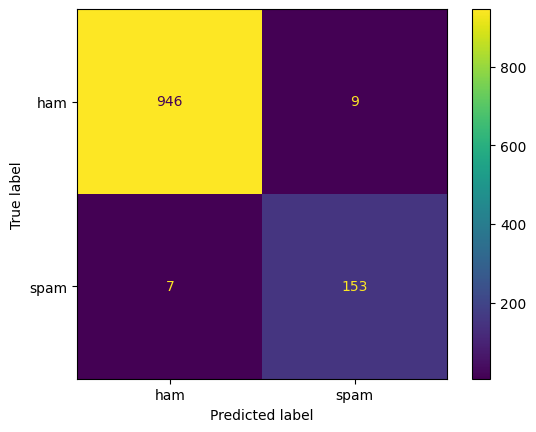

In [39]:
#displaying confusion matrix
target_names = ["ham", "spam"]
confusion_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = target_names)
disp.plot()
plt.show()

In [40]:
#Classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.94      0.96      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [41]:
#printing the taken to run this notebook
tock = perf_counter()
f"Time taken to run this notebook was {round((tock-tick), 2)}s."

'Time taken to run this notebook was 37.81s.'